# Homework 03: Kepler's Equation
## William Jardee

Note: My process most likely looks quite a bit like other's code. With my experience in python I ended up walking many other them through how to do ideas like arrays, for loops, functions, and all that jazz. Consequently there was more of a focus on understanding what my code was doing than on creating a unique solution. I did my best to prevent blantant copying, but if there was an issue please let me know. <Br>
The main people I worked with to develope their code was Brianna, Silas, Ethan, Eamon, and Ian. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Given bisect equation:
(I was about to use the importable bisect formula, but I didn't have the way, without universal variables, to edit what the func was passed with that)

In [2]:
def bisect(func_name, t, xL, xR):
    """
    Find the solution to the input equation f(x) = 0 for some input function. 
    Start with the interval xL xR, and return a solution with a relative error
    0.5e-5.

    Input
    ----------
    func_name: This is the name of the function that I want to find roots for
    t:         The time to solve for, this is the independent variable we are solving with respect to
    xL:        Smaller 'x' value I want to evaluate func_name at
    xR:        Higher 'x' value I want to evaluate func_name at

    Output
    ----------
    x_zero: 'x' value that returns func_name(x) = 0
    """
    
    fL = func_name(t, xL)
    fR = func_name(t, xR)

    if fL * fR > 0:     # Same sign on both sides
        return print("Both values give the same sign.") #Exit if inputs are wrong

    while np.abs( xR - xL ) > 1.0e-5 * np.max(np.abs([xL,xR])):
        xMP = 0.5*(xL + xR)
        fMP = func_name(t, xMP)

        if fMP == 0:       # Got lucky and found the root exactly
            return xMP

        if fMP * fR > 0:
            xR = xMP
            fR = fMP

        else:
            xL = xMP
            fL = fMP
    x_zero = 0.5 * (xL + xR)

    return x_zero


Encoding the kepler equation as given in the assignment. This is with a start day of Jan 3, 2018 (3), period of 365.25 days, and $e$ of 0.0167. I assumed that we will just care about the day and not the hour, so I threw out the time we started on the 3rd and assumed we will measure on the same time each day. To use the bisect equation, we need to look for zeros, which can be gained by moving everything over to one side.

In [3]:
(P, T, E) = (365.25, 3, 0.0167)
#Variables defined in the markdown above

def Kep_mot(t, u):
    return ((2*np.pi/P)*(t-T) - u + E*np.sin(u))


Creating both of the solution sets:

In [4]:
l1 = 365 - T        #The number of days left in the year
u1 = np.zeros(l1)   #creating an empty array to fill up in a minure
u1[0] = bisect(Kep_mot, T, -1, 1)    #Giving a good base for the first value. Trial and error is required to get this first one
for i in range(1,l1):
    #Doing a little playing around with bisect and other graphing tools, the area we are playing with looks linear,
    #So the previous value is used as the left point, and that point plus some is used for the next one. 
    u1[i] = bisect(Kep_mot, i+T, u1[i-1], u1[i-1]+1)    
    
l2 = int(l1/30)+1   #The number of 30 day ints left in the year, with forced int division and +1 to ceiling instead of floor it
u2 = np.zeros(l2)   #creating an empty array to fill up in a minure
u2[0] = bisect(Kep_mot, T, -1,1)
for i in range(1,l2):
    #For good measure I multiplied the new gap by 10 to watch for larger jumps. 
    #If you do 1, the jump between points is more than the upper bound
    u2[i] = bisect(Kep_mot, i*30 + T, u2[i-1], u2[i-1]+10)
        

Graphing both solution sets over each other:

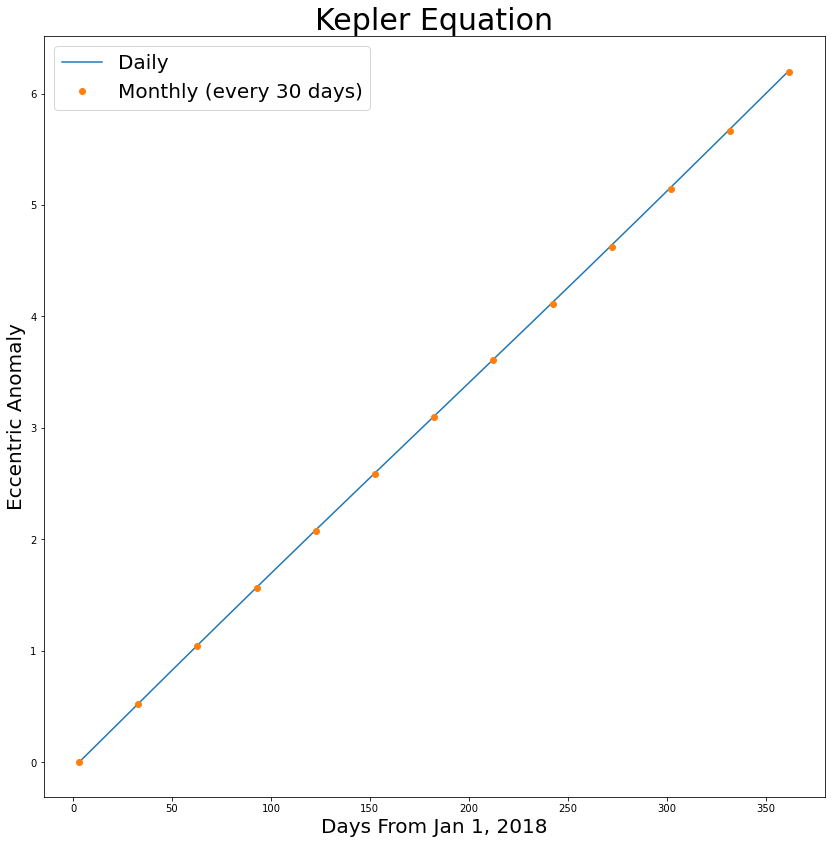

In [5]:
x1 = np.linspace(3,l1,l1) #Create a counterpart for each point. I would have prefered to do this in a 2d array to avoid this touchy step
x2 = np.linspace(3,l1, l2)

#Plotting and making it pretty
ax = plt.figure(figsize = (14,14))
plt.plot(x1, u1, label = "Daily")
plt.plot(x2, u2, 'o', label = "Monthly (every 30 days)")
plt.legend(fontsize = 20)
plt.title('Kepler Equation', fontsize=30)
plt.xlabel('Days From Jan 1, 2018', size = 20)
plt.ylabel('Eccentric Anomaly',size = 20)
plt.show()

With playing around with resolution and making sure array sizes are nice. As to be expected, we get pretty much the same graph. The main difference is the resolution, one just being a scatter plot. The other difference is the slight error in the monthly graph. This is to be expected, since next to a very straight line with error canceling each other out on both sides, having any slight error will be amplified. 